# Training analysis

The purpose of this notebook is to visualize results of training, i.e. training- & validation-loss.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
output_reports = '/content/drive/MyDrive/outputs/reports'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join

In [ ]:
df = pd.read_csv(join(output_reports, 'summary_mobilenet.csv'), header = None)
df.columns = ['pos', 'mode', 'loss', 'loc_loss', 'regr_loss', 'object_loss', 'rpn_box_regr_loss']

In [ ]:
df.head()

,pos,mode,loss,loc_loss,regr_loss,object_loss,rpn_box_regr_loss
0,0.00813,TRAIN,1.749348,1.087643,0.651226,0.003854,0.006625
1,0.01626,TRAIN,1.944565,1.284540,0.651783,0.004513,0.003728
2,0.02439,TRAIN,2.554790,1.686745,0.863564,0.000928,0.003553
3,0.03252,TRAIN,2.028202,1.329035,0.693670,0.002523,0.002975
4,0.04065,TRAIN,1.885557,1.235762,0.646603,0.001272,0.001920


In [ ]:
# Only consider epochs smaller than 287, since training excuction stopped due to
# cutting of runtime ressources.
# Moreover, we consider only the cummulated loss after a completed iteration.
df = df[(df['pos'] <= 287) & (df['pos']%1 == 0)]

In [ ]:
loss_val = df[df['mode'] == 'VAL']['loss']
pos_val = df[df['mode'] == 'VAL']['pos']
loss_train = df[df['mode'] == 'TRAIN']['loss']
pos_train = df[df['mode'] == 'TRAIN']['pos']

#### Plot loss

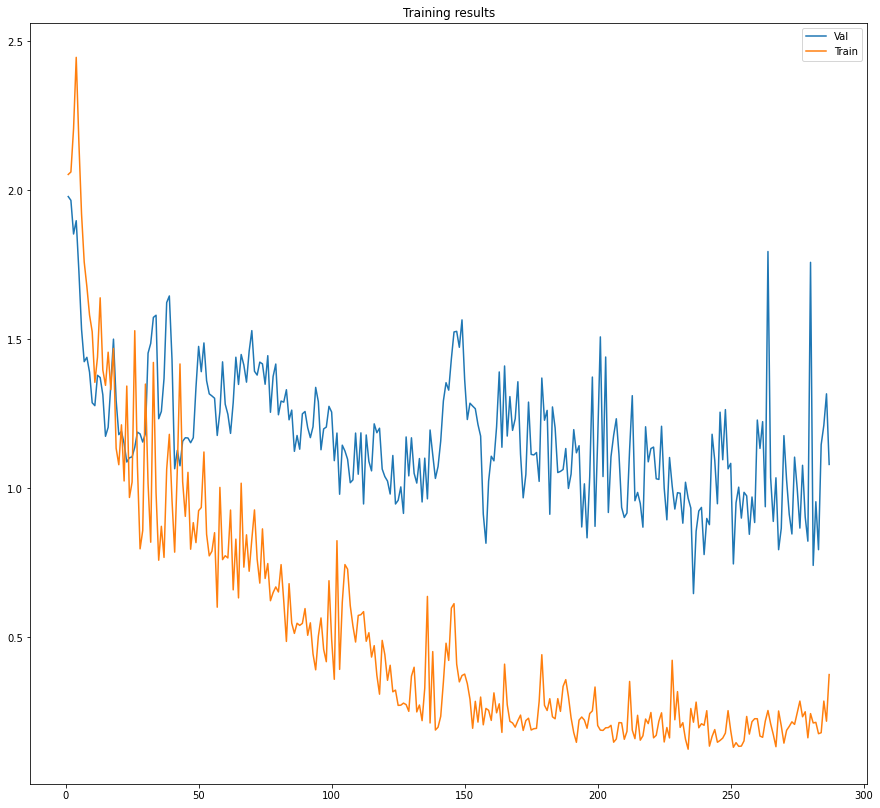

In [ ]:
plt.figure(figsize=[15,14])
plt.plot(pos_val, loss_val, label = "Val")
plt.plot(pos_train, loss_train, label = "Train")
plt.legend()
plt.title('Training results')
plt.savefig(join(output_reports, 'loss.svg'))
plt.show()